In [9]:
!pip uninstall fiftyone fiftyone-brain fiftyone-db -y
!pip uninstall fiftyone-desktop -y

Found existing installation: fiftyone 0.23.8
Uninstalling fiftyone-0.23.8:
  Successfully uninstalled fiftyone-0.23.8
Found existing installation: fiftyone-brain 0.16.1
Uninstalling fiftyone-brain-0.16.1:
  Successfully uninstalled fiftyone-brain-0.16.1
Found existing installation: fiftyone_db 1.1.2
Uninstalling fiftyone_db-1.1.2:
  Successfully uninstalled fiftyone_db-1.1.2


In [5]:
!pip install --upgrade fiftyone

### Загрузка тестового датасета 

In [2]:
import fiftyone as fo
import fiftyone.zoo as foz
import fiftyone.utils.coco as fouc

 
# Import the dataset
dataset = fo.Dataset.from_dir(
    name='drons_vs_berds_test',
    dataset_type=fo.types.COCODetectionDataset,
    data_path='/home/vlad/datasets/drons_vs_berds/images',
    labels_path='/home/vlad/datasets/drons_vs_berds/coco/dataset/drons_vs_berds_test.json',
    overwrite=True
   
)
fouc.add_coco_labels(
    dataset,
    "predictions faster rcnn new",
    "/home/vlad/projects/drons_vs_berds/train/detection2/output_test/coco_instances_results.json",
    classes=dataset.classes ,
)
fouc.add_coco_labels(
    dataset,
    "predictions faster rcnn last",
    "/home/vlad/projects/drons_vs_berds/prediction/detectron2/results/faster_rcnn_change_ancher.json",
    classes=dataset.classes ,
)  
fouc.add_coco_labels(
    dataset,
    "predictions_yolo",
    '/home/vlad/projects/drons_vs_berds/prediction/yolo/results/yolo8m_best_sahi_1024.json',
    classes=dataset.classes ,
)
 

# dataset = foz.load_zoo_dataset("quickstart")
session = fo.launch_app(dataset,address="127.0.0.1")

 100% |███████████████| 3116/3116 [2.1s elapsed, 0s remaining, 1.4K samples/s]         


In [5]:
dataset.classes

{}


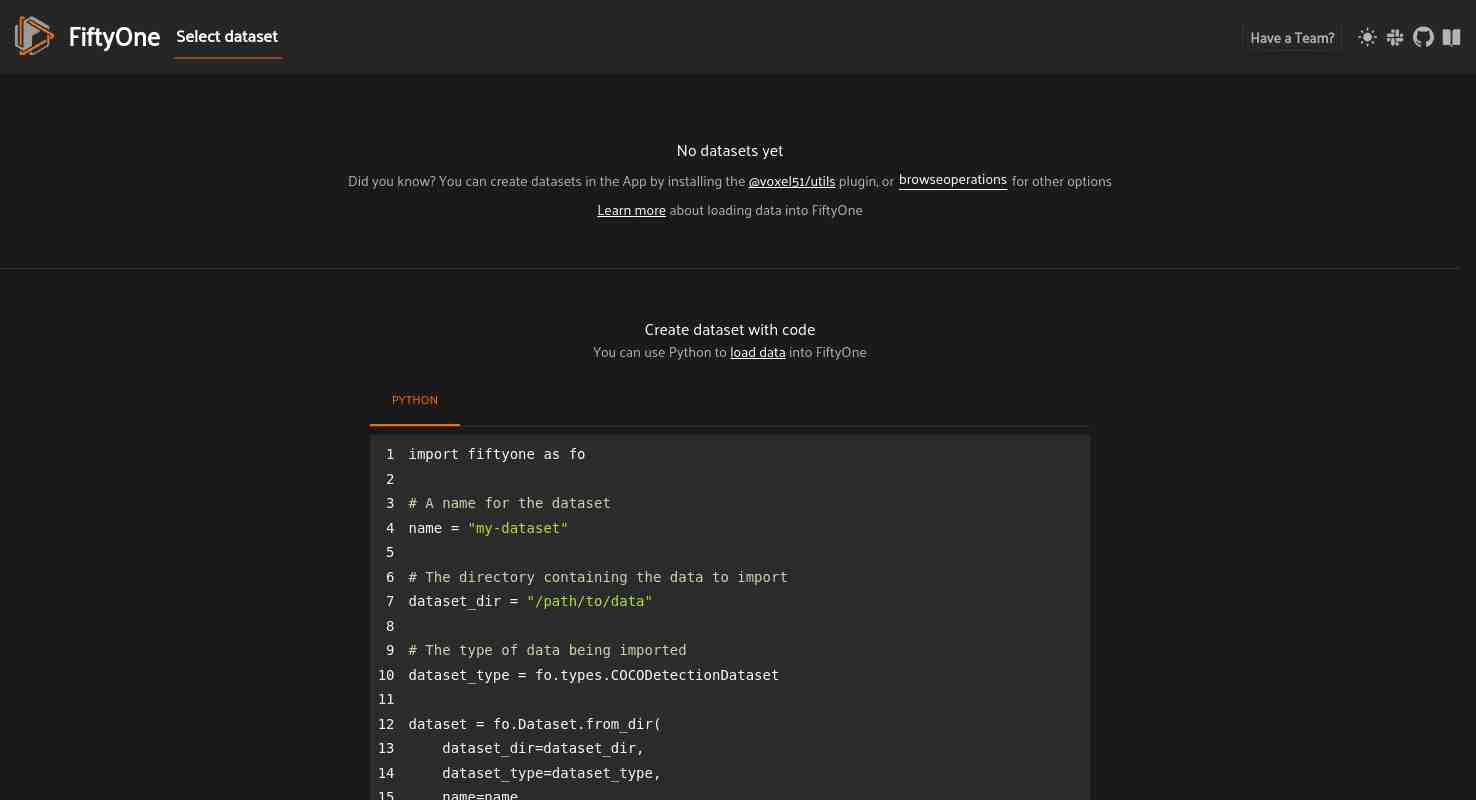

In [2]:
import fiftyone as fo
session = fo.launch_app(address="127.0.0.1")

In [16]:
import fiftyone as fo

name = "drons_vs_berds_test_slice_yolo"
dataset_dir = "/home/vlad/datasets/drons_vs_berds/slice/dataset"

# The splits to load
splits = ["test",'val','train']

# Load the dataset, using tags to mark the samples in each split
dataset = fo.Dataset(name, overwrite=True)
for split in splits:
    dataset.add_dir(
        dataset_dir=dataset_dir,
        dataset_type=fo.types.YOLOv5Dataset,
        split=split,
        tags=split,
)

 100% |███████████████| 9032/9032 [3.9s elapsed, 0s remaining, 2.3K samples/s]      
 100% |█████████████| 13748/13748 [5.9s elapsed, 0s remaining, 2.4K samples/s]      
 100% |█████████████| 76861/76861 [37.8s elapsed, 0s remaining, 2.2K samples/s]      


In [17]:
session = fo.launch_app(address="127.0.0.1")

In [3]:
import fiftyone as fo
import fiftyone.utils.coco as fou

# Load your dataset
# dataset = fo.Dataset.from_dir("path/to/your/dataset")

# Load predictions from COCO JSON file
predictions = fou.add_coco_labels("/home/vlad/projects/drons_vs_berds/train/detection2/output/coco_instances_results.json")

# Add predictions to your dataset
dataset.add_labels(predictions)

# Save your dataset
dataset.save()

TypeError: add_coco_labels() missing 3 required positional arguments: 'label_field', 'labels_or_path', and 'classes'

 100% |███████████████| 9032/9032 [6.0s elapsed, 0s remaining, 1.5K samples/s]      



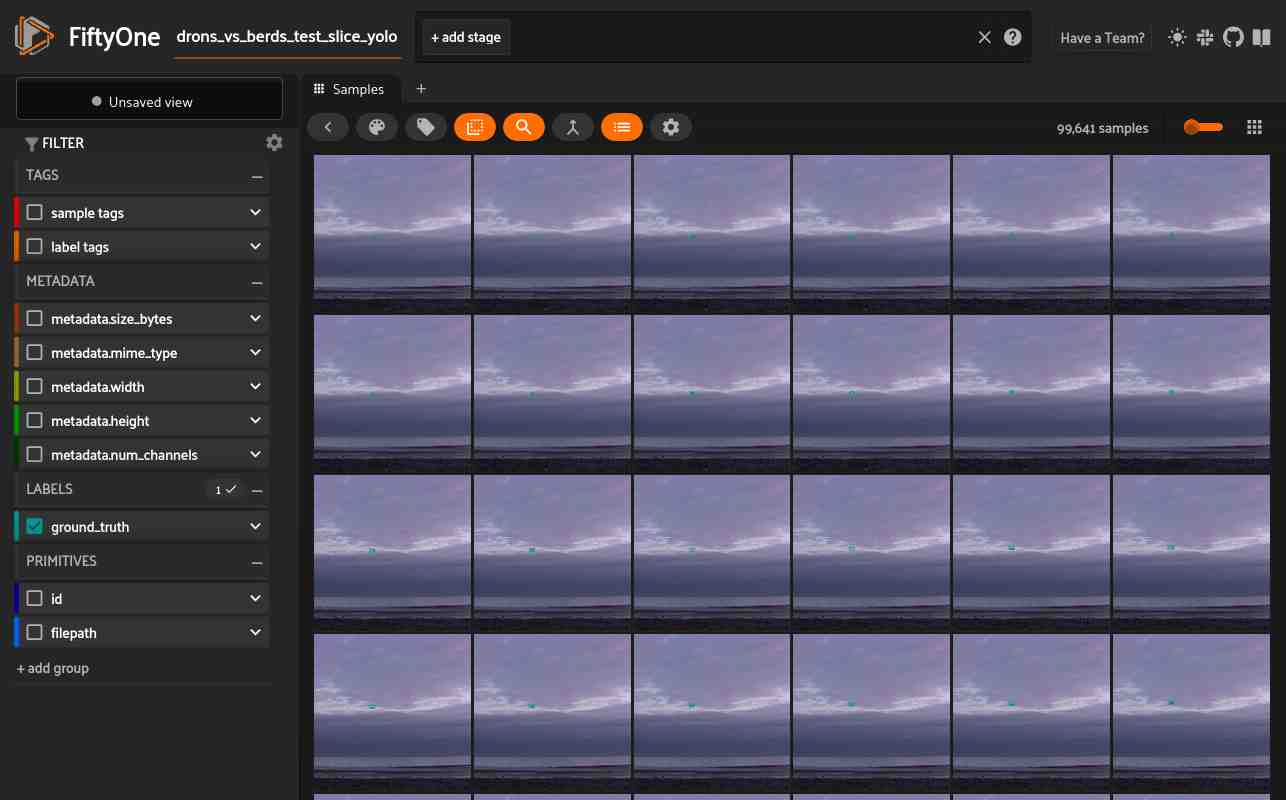

In [14]:
data_path = "/home/vlad/datasets/drons_vs_berds/slice/images/test"

# The path to the COCO labels JSON file
labels_path = "/home/vlad/datasets/drons_vs_berds/slice/dataset_test.json"

# Import the dataset
dataset = fo.Dataset.from_dir(  
    name='drons_vs_berds_test_slice',
     overwrite=True,
    dataset_type=fo.types.COCODetectionDataset,
    data_path=data_path,
    labels_path=labels_path,
)
session = fo.launch_app(address="127.0.0.1")